In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random


# Linear Regression

In [ ]:
def linear_regression(x, y, alpha):
    #cost function: B1 = B1 - alpha* 1/m * sum((B0 + B1x_i -y_i)x_i)
    m = len(x)
    B_0 = 0
    B_1 = 0
    for j in range(0,10):
        for i in range(0,10):
            diff_cost = [(B_0 + B_1 * i - j) * i for i,j in zip(x,y)]
            B_1 = B_1 - alpha / m * sum(diff_cost)
            B_0 = sum(y)/m - sum(x)/m *B_1
        print(B_1, B_0)

In [ ]:
x = [1,2,3,4,5]
y = [2,4,6,8,10.1]
linear_regression(x,y,alpha= 0.1)

# Multiple linear regression

## Setting up the Functions

In [2]:
# https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d4590

def cost_function(x, y, theta):
    squared = np.power(((x @ theta.T)-y), 2)
    return np.sum(squared)/(2*len(x))


def gradient_descent(x, y, theta, iter, alpha):
    cost = np.zeros(iter)
    for i in range(iter):
        theta = theta - (alpha/ len(x)) * np.sum(x * ((x @ theta.T)-y), axis = 0)
        cost[i] = cost_function(x, y, theta)
    
    return theta, cost

def normalize_z(df):
    data = (df - df.mean())/df.std()
    return data

## Setting up DataFrame

In [3]:
data = pd.DataFrame()
data['x'] = range(50)
random.seed(100)
data['y_exp'] = [2*i + random.randint(-9,9)/10 for i in range(50)]
display(data.head())

,x,y_exp
0,0,-0.5
1,1,2.5
2,2,4.5
3,3,5.6
4,4,8.3


## Normalising Data

In [4]:
df = (data - data.mean())/data.std()
display(df.head())

,x,y_exp
0,-1.680686,-1.699189
1,-1.612087,-1.596079
2,-1.543487,-1.527338
3,-1.474888,-1.489531
4,-1.406288,-1.396732


## Setting up Variables

In [5]:
# Setting up matrices
X = df[['x']]
ones = np.ones((X.shape[0],1))
X = np.concatenate((ones, X), axis = 1)

Y = df[['y_exp']].values
theta = np.zeros([1,2])

# setting up parameters
alpha = 0.01
iters = 1000

g, cost = gradient_descent(X, Y , theta, iters, alpha)
print('Y_norm = {} X_norm + {}'.format(round(g[0,1], 5), round(g[0,0], 5)))
print(cost[-1])

Y_norm = 0.9998 X_norm + 0.0
0.00014173020213057266


## Converting to unnormalised data

In [6]:
theta[0,1] = g[0,1] * data['y_exp'].std() / data['x'].std()
theta[0,0] = g[0,0] * data['y_exp'].std() - theta[0,1] * data['x'].mean() + data['y_exp'].mean()
print(theta)

[[0.04799501 1.99551041]]


## Calculating y_calc

In [7]:
data['y_calc'] = np.concatenate((ones,data[['x']]), axis = 1) @ theta.T
display(data.head())

,x,y_exp,y_calc
0,0,-0.5,0.047995
1,1,2.5,2.043505
2,2,4.5,4.039016
3,3,5.6,6.034526
4,4,8.3,8.030037


## Plotting Cost over iterations

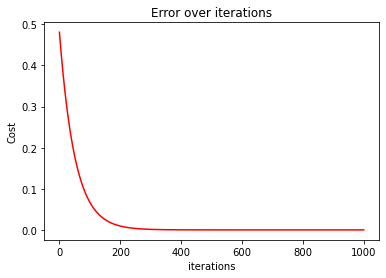

In [8]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('iterations')
ax.set_ylabel('Cost')
ax.set_title('Error over iterations')
plt.show()   

## Visualising Data

In [9]:
sns.set()
sns.scatterplot(x = 'x', y ='y_exp' , data = data, color = 'r')
sns.lineplot(x = 'x', y ='y_calc' , data = data)
plt.show()

NameError: name 'data' is not defined

## Testing & Training Data

# Importing Data

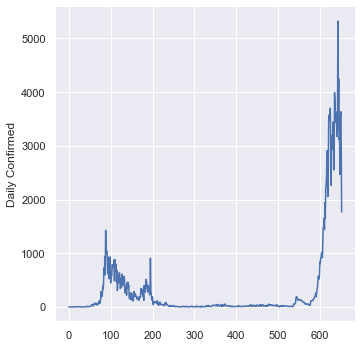

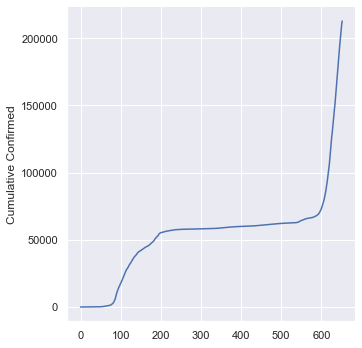

In [19]:
df1 = pd.read_csv('archive/covid19_sg.csv')
data1 = df1.loc[:,['Date', 'Daily Confirmed', 'Cumulative Confirmed']]

sns.set()
sns.relplot(x = data1.index, y = data1['Daily Confirmed'], kind = 'line')
sns.relplot(x = data1.index, y = data1['Cumulative Confirmed'], kind = 'line')
plt.show()


# Test

In [ ]:
def multiple_lin_reg(y, x, alpha, theta):
    m = len(y)
    B = theta
    for i in range(0, 10):
        diff_vec = np.sum(x * ((x @ B.T) - y), axis = 0)
        v2 = - alpha/m * diff_vec
        print(v2, B.shape)
        B = B - np.transpose(v2)
    return B

In [ ]:
x = [1,2,3,4,5]
y = [2,4,6,8,10.1]
theta = np.zeros([1,2])
x_mat = np.array([[1, i] for i in x])
y_vec = np.array([[i] for i in y])
display(x_mat.shape) 
display(theta.shape)
display(x_mat@theta.T)
multiple_lin_reg(x = x_mat,y =  y_vec, alpha= 0.01, theta = np.array([[0, 0]]))

In [ ]:
df_x = pd.DataFrame(x_mat)
df_y = y_vec
B_0 = multiple_lin_reg(y = df_y, x =  df_x, alpha = 0.02, theta= np.zeros([1,2]))
display(B_0)

display(df_y)

sns.relplot(x = df['x'], y = df['y'], kind = 'scatter')
sns.relplot(x = df['x'], y = df['y_exp'], kind = 'line')
plt.show()